# Looking at the period of 1963 to 2022, lets run a Fama Macbeth style regression on size and value (Market not considered to simplify methodology)

In [134]:
# import packages
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.regression.linear_model as sm #Needed for OLS regression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [135]:
# Read in FF Three Factor Model data - factor loadings also in this file 
ff3 = pd.read_csv("F-F_Research_Data_Factors.csv", header=2)
ff3 = ff3.set_index("Unnamed: 0")
ff3.index.names = ['Date']  #rename index name
ff3 = ff3.iloc[437:1158,:] # include only simulation dates we're looking for

In [156]:
ff3.astype(float)

,Mkt-RF,SMB,HML,RF
Date,,,,
196212,1.01,-3.80,0.36,0.23
196301,4.93,3.08,2.21,0.25
196302,-2.38,0.48,2.18,0.23
196303,3.08,-2.59,2.06,0.23
196304,4.51,-1.34,1.00,0.25
...,...,...,...,...
202208,-3.77,1.37,0.30,0.19
202209,-9.35,-0.79,0.06,0.19
202210,7.83,0.09,8.05,0.23


In [136]:
ind_port_30 = pd.read_csv("30_Industry_Portfolios.csv", header = 6)  #these are the monthly returns of our industry portfolios
ind_port_30 = ind_port_30.set_index("Unnamed: 0")
ind_port_30.index.names = ['Date']
ind_port_30 = ind_port_30.iloc[437:1158,:]
ind_port_30["RF"] = ff3["RF"]  #add in risk free rate at the end to determine monthly excess returns next
ind_port_30 = ind_port_30.astype(float)  #to allow us to do calculations

In [137]:
ind_port_30 

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other,RF
Date,,,,,,,,,,,,,,,,,,,,,
196212,2.81,2.46,-2.17,2.06,-3.65,0.80,-0.51,0.89,1.14,0.74,...,1.47,-0.84,-1.39,1.34,0.23,0.08,-2.30,1.68,2.26,0.23
196301,6.64,4.03,1.72,8.69,6.55,5.46,6.46,5.65,4.46,8.82,...,1.36,6.14,8.23,5.97,3.57,4.12,7.53,3.63,8.64,0.25
196302,-2.73,-5.05,-3.36,-6.65,-1.94,-3.25,-3.38,-2.58,-3.85,0.65,...,0.06,-4.11,-2.17,0.30,-1.87,-0.55,-3.74,-0.30,0.30,0.23
196303,1.73,4.61,7.74,1.12,-0.87,4.00,1.43,1.18,3.65,0.83,...,3.90,3.70,3.01,3.30,0.60,2.17,-5.72,2.31,5.29,0.23
196304,1.10,0.66,6.30,-0.80,7.95,6.02,1.80,7.62,4.44,7.69,...,2.43,6.78,4.86,8.51,5.64,5.50,0.48,3.68,6.11,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202208,-1.60,-1.87,-0.12,-2.95,-4.97,-2.16,-6.01,-5.07,-1.38,-12.20,...,-4.70,-5.89,-7.66,-1.46,-1.60,-3.46,-1.47,-2.24,-3.65,0.19
202209,-7.79,-5.21,-10.55,-6.24,-13.42,-10.60,-17.36,-1.91,-11.25,-15.53,...,-11.07,-11.54,-13.27,-14.24,-9.46,-7.67,-6.26,-7.73,-6.40,0.19
202210,9.87,9.49,12.08,13.36,8.82,5.68,10.72,8.84,8.94,8.37,...,1.99,8.97,10.02,6.68,13.65,1.94,10.26,12.80,11.25,0.23


### Excess Returns

In [138]:
excess_returns = ind_port_30.transpose() - np.array([ind_port_30["RF"]])  #subtract risk free rate
excess_returns = excess_returns.transpose()
excess_returns = excess_returns.iloc[:,:-1]  #remove risk free rate column
excess_returns

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
196212,2.58,2.23,-2.40,1.83,-3.88,0.57,-0.74,0.66,0.91,0.51,...,0.85,1.24,-1.07,-1.62,1.11,0.00,-0.15,-2.53,1.45,2.03
196301,6.39,3.78,1.47,8.44,6.30,5.21,6.21,5.40,4.21,8.57,...,3.88,1.11,5.89,7.98,5.72,3.32,3.87,7.28,3.38,8.39
196302,-2.96,-5.28,-3.59,-6.88,-2.17,-3.48,-3.61,-2.81,-4.08,0.42,...,-1.32,-0.17,-4.34,-2.40,0.07,-2.10,-0.78,-3.97,-0.53,0.07
196303,1.50,4.38,7.51,0.89,-1.10,3.77,1.20,0.95,3.42,0.60,...,1.71,3.67,3.47,2.78,3.07,0.37,1.94,-5.95,2.08,5.06
196304,0.85,0.41,6.05,-1.05,7.70,5.77,1.55,7.37,4.19,7.44,...,3.48,2.18,6.53,4.61,8.26,5.39,5.25,0.23,3.43,5.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202208,-1.79,-2.06,-0.31,-3.14,-5.16,-2.35,-6.20,-5.26,-1.57,-12.39,...,-3.20,-4.89,-6.08,-7.85,-1.65,-1.79,-3.65,-1.66,-2.43,-3.84
202209,-7.98,-5.40,-10.74,-6.43,-13.61,-10.79,-17.55,-2.10,-11.44,-15.72,...,-14.13,-11.26,-11.73,-13.46,-14.43,-9.65,-7.86,-6.45,-7.92,-6.59
202210,9.64,9.26,11.85,13.13,8.59,5.45,10.49,8.61,8.71,8.14,...,10.71,1.76,8.74,9.79,6.45,13.42,1.71,10.03,12.57,11.02


Note: Although December 1962 returns are not needed, it makes dataframe handling a lot easier to take the same dates as we need for size and value

### Average Size of firm in industry portfolio, scaled by log - think why

In [111]:
# Import size and transform to log values
size_30 = pd.read_csv("30_Industry_Portfolios.csv", header = 3691)
size_30 = size_30.set_index("Unnamed: 0")
size_30.index.names = ['Date']
size_30 = size_30.iloc[437:1158,:]
size_30 = size_30.astype(float)
size_30 = np.log(size_30) 
size_30

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
196212,5.373657,4.782479,5.706911,4.473009,3.936911,5.183748,3.843316,5.869410,6.359712,3.827336,...,7.956056,4.202451,6.400407,5.711685,4.741448,4.233817,5.335083,3.505257,5.102424,3.958907
196301,5.399067,4.803283,5.683716,4.491889,3.895284,5.190064,3.834494,5.876222,6.369850,3.832114,...,7.965466,4.210793,6.391515,5.695750,4.750309,4.231930,5.334794,3.477541,5.136622,3.977249
196302,5.462433,4.841506,5.700778,4.574814,3.958143,5.239787,3.894673,5.930254,6.413311,3.912023,...,8.005944,4.224203,6.451039,5.773526,4.805905,4.265071,5.371475,3.550192,5.172187,4.058717
196303,5.431274,4.785072,5.656132,4.500032,3.937301,5.204776,3.857567,5.901157,6.368290,3.915417,...,7.988390,4.222738,6.406269,5.747034,4.802873,4.244057,5.374862,3.505257,5.166271,4.058026
196304,5.445918,4.826953,5.729450,4.509650,3.976124,5.243016,3.869533,5.911555,6.403044,3.920785,...,8.006281,4.254903,6.442142,5.774955,4.847803,4.246636,5.394763,3.442979,5.186100,4.108247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202208,9.542305,10.190271,11.251582,8.477727,7.557086,9.543585,9.073267,8.447665,8.929250,7.496797,...,10.008025,9.553296,10.118465,9.078451,9.459722,8.562927,9.975525,9.379798,9.122968,8.233466
202209,9.524296,10.170932,11.250332,8.447569,7.504678,9.521061,9.010989,8.396541,8.923708,7.366673,...,9.995447,9.511141,10.062708,8.993189,9.456975,8.545569,9.938609,9.379517,9.098566,8.199266
202210,9.439896,10.111905,11.120821,8.382978,7.357339,9.430816,8.816569,8.379482,8.802312,7.197024,...,9.845059,9.397765,9.943381,8.847810,9.302691,8.445366,9.864228,9.314623,9.023036,8.144528


In [153]:
ff3['Mkt-RF'].loc["201801":"202212"].astype(float).mean()*12

9.02

### Now take aggregate Book to Market ratio of each industry 

In [139]:
value_30 = pd.read_csv("30_Industry_Portfolios.csv", header = 4854)
value_30 = value_30.set_index("Unnamed: 0")  #note - only reported on an annual frequency - must be addressed
value_30.index.names = ['Date']
value_30 = value_30.iloc[36:97,:]
value_30 = value_30.astype(float)
value_30

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1962,0.52,1.01,0.50,0.68,0.51,0.45,0.80,0.28,0.48,1.56,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
1963,0.47,0.81,0.56,0.51,0.39,0.26,0.64,0.27,0.38,1.25,...,0.53,0.70,0.27,0.54,1.70,0.74,0.49,0.74,0.56,0.70
1964,0.43,1.03,0.52,0.49,0.35,0.24,0.68,0.26,0.33,1.01,...,0.47,0.70,0.23,0.53,1.29,0.70,0.42,0.66,0.59,0.78
1965,0.44,0.69,0.57,0.49,0.34,0.22,0.58,0.23,0.34,0.82,...,0.54,0.63,0.26,0.55,1.43,0.72,0.39,0.64,0.67,0.81
1966,0.51,0.70,0.64,0.30,0.28,0.18,0.56,0.20,0.41,0.74,...,0.67,0.53,0.22,0.54,1.06,0.53,0.49,0.52,0.77,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.33,0.14,0.14,0.14,0.59,0.24,0.16,0.19,0.42,0.43,...,0.43,0.16,0.22,0.21,0.28,0.32,0.16,0.14,0.55,0.39
2019,0.31,0.14,0.17,0.15,0.72,0.18,0.16,0.19,0.48,0.61,...,0.44,0.15,0.19,0.27,0.28,0.33,0.16,0.10,0.56,0.31
2020,0.36,0.17,0.09,0.15,0.80,0.14,0.16,0.19,0.42,0.98,...,0.50,0.15,0.15,0.31,0.31,0.33,0.14,0.24,0.70,0.44


### Assume year-end Book to Market ratio is recorded in December, thus, January to November of same year take the previous year's value

In [140]:
# Infer annual to monthly frequency
value_30_m = pd.DataFrame(np.repeat(value_30.values,12, axis=0)) # duplicated by 12 to run from December-December
value_30_m.columns = value_30.columns  #match column names of industry portfolios
value_30_m = value_30_m.iloc[:-11,:] #only need December value for 2022
value_30_m.index = size_30.index  #match dates
value_30_m

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
196212,0.52,1.01,0.50,0.68,0.51,0.45,0.8,0.28,0.48,1.56,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196301,0.52,1.01,0.50,0.68,0.51,0.45,0.8,0.28,0.48,1.56,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196302,0.52,1.01,0.50,0.68,0.51,0.45,0.8,0.28,0.48,1.56,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196303,0.52,1.01,0.50,0.68,0.51,0.45,0.8,0.28,0.48,1.56,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196304,0.52,1.01,0.50,0.68,0.51,0.45,0.8,0.28,0.48,1.56,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202208,0.30,0.13,0.03,0.10,0.39,0.12,0.1,0.16,0.29,0.57,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32
202209,0.30,0.13,0.03,0.10,0.39,0.12,0.1,0.16,0.29,0.57,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32
202210,0.30,0.13,0.03,0.10,0.39,0.12,0.1,0.16,0.29,0.57,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32


## Data now cleaned and proccessed!

In [141]:
fama_macbeth_data = pd.concat([excess_returns,size_30, value_30_m],axis=1).reindex(excess_returns.index)
fama_macbeth_data

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
196212,2.58,2.23,-2.40,1.83,-3.88,0.57,-0.74,0.66,0.91,0.51,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196301,6.39,3.78,1.47,8.44,6.30,5.21,6.21,5.40,4.21,8.57,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196302,-2.96,-5.28,-3.59,-6.88,-2.17,-3.48,-3.61,-2.81,-4.08,0.42,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196303,1.50,4.38,7.51,0.89,-1.10,3.77,1.20,0.95,3.42,0.60,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
196304,0.85,0.41,6.05,-1.05,7.70,5.77,1.55,7.37,4.19,7.44,...,0.62,0.45,0.20,0.61,2.49,0.78,0.55,1.02,0.71,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202208,-1.79,-2.06,-0.31,-3.14,-5.16,-2.35,-6.20,-5.26,-1.57,-12.39,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32
202209,-7.98,-5.40,-10.74,-6.43,-13.61,-10.79,-17.55,-2.10,-11.44,-15.72,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32
202210,9.64,9.26,11.85,13.13,8.59,5.45,10.49,8.61,8.71,8.14,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32


In [154]:
fama_macbeth_data.to_csv("Fama_Macbeth_Data.csv")  #run this line to save processed data to try yourself!

## Cross Sectional Regression 

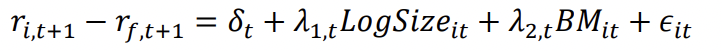
We repeat this regression for every month, using our 30 industry portfolios as the 'cross-section'

##  If we wanted to include market beta?

If we wanted to include the market factor, we would first need to measure factor exposures first, then use those as our regressors (instead of the characteristics themselves, betas known as 'generated regressors'). This is almost like a **'step zero'** in the Fama Macbeth regression. We would need to first estimate the beta of each stock to the market running some form of a time series regression of stock returns on market returns to then infer the size of the factor premium at the end of the analysis (could naively let it be constant over the sample, or calculate on a rolling basis say every month based on 5 years prior as in FF 92). Can you remember what **pre and post ranking betas** in FF 92 referred to and what was the reasoning behind them? 

Important: **Measurement error when estimating beta** is very important in determining the bias of our overall results (for example correlation with size and insufficient separation between the two leading to Error In Variables bias) .Shanken 1992; Kim 1995; Chen, Lee, and Lee 2015 aim to rectify this.

## Step 1: Run cross-sectional regressions over sample period

In [142]:
# Here, we run the cross-section regression over every month in our simulation period. 

#This is the list of values where we store our regression values every month
delta = [] 
lambda_1 = []
lambda_2 = []

for i in range(len(fama_macbeth_data)-1): 
    returns_df = pd.DataFrame(fama_macbeth_data.iloc[i+1,:30]) # extracts excess returns t+1 for all industries
    returns_df = returns_df.reset_index() # index reset to concat dataframe 
    
    log_size = np.array(fama_macbeth_data.iloc[i,30:60]) # extracts log Size t for all industries
    log_size_df = pd.DataFrame(log_size, columns=["Log size"])
    
    bm = np.array(fama_macbeth_data.iloc[i,60:90]) # extracts BM t for all industries
    bm_df = pd.DataFrame(bm, columns = ["BM"])
    
    factors = pd.concat([log_size_df,bm_df],axis=1) # dataframe transformed to desired form for OLS regression

    model = sm.OLS(returns_df.iloc[:,1],statsmodels.tools.tools.add_constant(factors[["Log size", "BM"]])) #Constant assumed
    results = model.fit() # assumes IID
    
    # results saved for every month
    delta.append(results.params[0])
    lambda_1.append(results.params[1])
    lambda_2.append(results.params[2])

## Behind the scene in each iteration of the for loops...this is the first month for example

In [143]:
returns_df = pd.DataFrame(fama_macbeth_data.iloc[1,:30]) # extracts excess returns t+1 for all industries
returns_df = returns_df.reset_index() # index reset to concat dataframe 
    
log_size = np.array(fama_macbeth_data.iloc[0,30:60]) # extracts log Size t for all industries
log_size_df = pd.DataFrame(log_size, columns=["Log size"])
    
bm = np.array(fama_macbeth_data.iloc[0,60:90]) # extracts BM t for all industries
bm_df = pd.DataFrame(bm, columns = ["BM"])
    
factors = pd.concat([log_size_df,bm_df],axis=1) # dataframe transformed to desired form for OLS regression

model = sm.OLS(returns_df.iloc[:,1],statsmodels.tools.tools.add_constant(factors[["Log size", "BM"]])) #Constant assumed
results = model.fit() # assumes IID
print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                 196301   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     2.182
Date:                Thu, 18 May 2023   Prob (F-statistic):              0.132
Time:                        12:43:45   Log-Likelihood:                -65.844
No. Observations:                  30   AIC:                             137.7
Df Residuals:                      27   BIC:                             141.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2464      2.671      3.087      0.0

**We are predicting January 1963 returns using book to market and log size from December 1962**

## And repeat this regression for every month in sample (720 times)

## A look at estimated coefficients over time - note scale change of orange due to log transformation


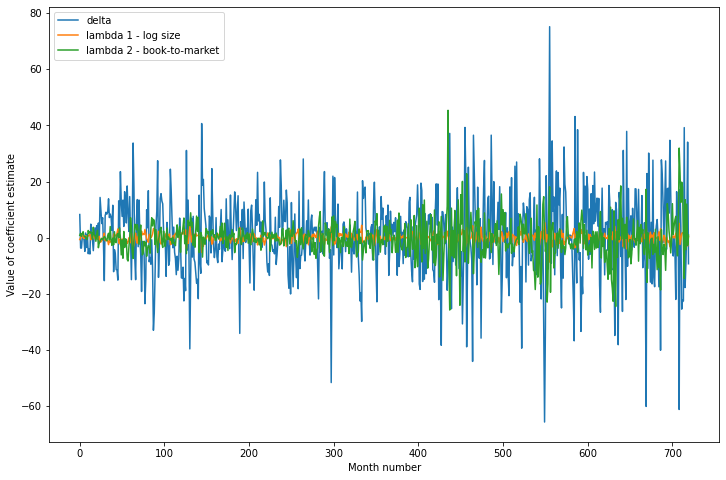

In [144]:
plt.figure(figsize=(12,8))
plt.plot(delta,label='delta')
plt.plot(lambda_1,label='lambda 1 - log size')
plt.plot(lambda_2,label='lambda 2 - book-to-market')
plt.ylabel("Value of coefficient estimate")
plt.xlabel("Month number")
plt.legend();

## Step 2 - Take average of all estimated cross-sectional coefficients calculated in step 1

In [145]:
delta_fama_macbeth = np.mean(delta)
lambda_1_fama_macbeth = np.mean(lambda_1)
lambda_2_fama_macbeth = np.mean(lambda_2)

## Aside on statistical significance and standard error

We need to regress the coefficient estimates on a constant over time, allowing us to take **Newey West standard errors** - lag number of 6 is common for monthly frequency data. This aims to give us more robust test statistics.

'HAC' = heteroskedasticity-autocorrelation robust covariance

In [116]:
model_1 = sm.OLS(lambda_1,np.ones((720,1))) # Regressing on a constant 1
results_1 = model_1.fit(cov_type = "HAC", cov_kwds={"maxlags":6}) # Newey West standard errors

In [117]:
model_2 = sm.OLS(lambda_2,np.ones((720,1))) # Regressing on a constant 1
results_2= model_2.fit(cov_type = "HAC", cov_kwds={"maxlags":6}) # Newey West standard errors

In [118]:
model_3 = sm.OLS(delta,np.ones((720,1))) # Regressing on a constant 1
results_3 = model_3.fit(cov_type = "HAC", cov_kwds={"maxlags":6}) # Newey West standard errors

In [130]:
from tabulate import tabulate
table = [["Coefficient", "Coefficient estimate", "Newey-West StdErr", "P-Value"],
         ["Delta", results_3.params[0], results_3.bse[0], results_3.pvalues[0]],
         ["Lambda 1 - Monthly return on log size", results_1.params[0], results_1.bse[0], results_1.pvalues[0]],
         ["Lambda 2 - Monthly return on book/market", results_2.params[0], results_2.bse[0], results_2.pvalues[0]]]

In [131]:
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤════════════════════════╤═════════════════════╤═══════════╕
│ Coefficient                              │   Coefficient estimate │   Newey-West StdErr │   P-Value │
╞══════════════════════════════════════════╪════════════════════════╪═════════════════════╪═══════════╡
│ Delta                                    │             0.739095   │           0.562507  │  0.18887  │
├──────────────────────────────────────────┼────────────────────────┼─────────────────────┼───────────┤
│ Lambda 1 - Monthly return on log size    │            -0.00741059 │           0.0606843 │  0.902806 │
├──────────────────────────────────────────┼────────────────────────┼─────────────────────┼───────────┤
│ Lambda 2 - Monthly return on book/market │            -0.247442   │           0.272258  │  0.363429 │
╘══════════════════════════════════════════╧════════════════════════╧═════════════════════╧═══════════╛


### Re run on different sub sample of data

In [97]:
fama_macbeth_data_1985 = fama_macbeth_data.loc["198501":,]
fama_macbeth_data_1985

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
198501,0.12,4.61,1.70,13.20,10.90,6.85,11.89,7.59,6.44,7.84,...,1.18,0.40,0.49,0.85,1.02,0.57,0.62,0.50,1.16,0.70
198502,5.51,0.85,9.25,2.33,1.30,0.11,1.20,3.03,1.66,2.71,...,1.18,0.40,0.49,0.85,1.02,0.57,0.62,0.50,1.16,0.70
198503,6.35,3.66,2.52,0.22,3.69,-3.64,-0.05,2.38,-2.81,-4.34,...,1.18,0.40,0.49,0.85,1.02,0.57,0.62,0.50,1.16,0.70
198504,-2.50,0.75,-8.90,-1.52,-0.37,-1.78,-0.42,-2.42,0.07,-3.54,...,1.18,0.40,0.49,0.85,1.02,0.57,0.62,0.50,1.16,0.70
198505,10.88,7.79,-0.65,5.34,6.46,4.00,8.99,8.88,7.13,2.95,...,1.18,0.40,0.49,0.85,1.02,0.57,0.62,0.50,1.16,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202208,-1.79,-2.06,-0.31,-3.14,-5.16,-2.35,-6.20,-5.26,-1.57,-12.39,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32
202209,-7.98,-5.40,-10.74,-6.43,-13.61,-10.79,-17.55,-2.10,-11.44,-15.72,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32
202210,9.64,9.26,11.85,13.13,8.59,5.45,10.49,8.61,8.71,8.14,...,0.39,0.11,0.11,0.20,0.16,0.22,0.12,0.11,0.49,0.32


In [98]:
# Here, we run the cross-section regression over every month in our simulation period. 

#This is the list of values where we store our regression values every month
delta_1985 = [] 
lambda_1_1985 = []
lambda_2_1985 = []

for i in range(len(fama_macbeth_data_1985)-1): 
    returns_df = pd.DataFrame(fama_macbeth_data_1985.iloc[i+1,:30]) # extracts excess returns t+1 for all industries
    returns_df = returns_df.reset_index() # index reset to concat dataframe 
    
    log_size = np.array(fama_macbeth_data_1985.iloc[i,30:60]) # extracts log Size t for all industries
    log_size_df = pd.DataFrame(log_size, columns=["Log size"])
    
    bm = np.array(fama_macbeth_data_1985.iloc[i,60:90]) # extracts BM t for all industries
    bm_df = pd.DataFrame(bm, columns = ["BM"])
    
    factors = pd.concat([log_size_df,bm_df],axis=1) # dataframe transformed to desired form for OLS regression

    model = sm.OLS(returns_df.iloc[:,1],statsmodels.tools.tools.add_constant(factors[["Log size", "BM"]])) #Constant assumed
    results = model.fit() # assumes IID
    
    # results saved for every month
    delta_1985.append(results.params[0])
    lambda_1_1985.append(results.params[1])
    lambda_2_1985.append(results.params[2])

In [99]:
delta_fama_macbeth_1985 = np.mean(delta_1985)
lambda_1_fama_macbeth_1985 = np.mean(lambda_1_1985)
lambda_2_fama_macbeth_1985 = np.mean(lambda_2_1985)

In [132]:
model_1_1985 = sm.OLS(lambda_1_1985,np.ones((455,1))) # Regressing on a constant 1
results_1_1985 = model_1_1985.fit(cov_type = "HAC", cov_kwds={"maxlags":6}) # Newey West standard errors
model_2_1985 = sm.OLS(lambda_2_1985,np.ones((455,1))) # Regressing on a constant 1
results_2_1985= model_2_1985.fit(cov_type = "HAC", cov_kwds={"maxlags":6}) # Newey West standard errors
model_3_1985 = sm.OLS(delta_1985,np.ones((455,1))) # Regressing on a constant 1
results_3_1985 = model_3_1985.fit(cov_type = "HAC", cov_kwds={"maxlags":6}) # Newey West standard errors

table_1985 = [["Coefficient", "Coefficient estimate", "Newey-West StdErr", "P-Value"],
         ["Delta", results_3_1985.params[0], results_3_1985.bse[0], results_3_1985.pvalues[0]],
         ["Lambda 1 - Monthly return on log size", results_1_1985.params[0], results_1_1985.bse[0], results_1_1985.pvalues[0]],
         ["Lambda 2 - Monthly return on book/market", results_2_1985.params[0], results_2_1985.bse[0], results_2_1985.pvalues[0]]]

In [133]:
print(tabulate(table_1985, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤════════════════════════╤═════════════════════╤═══════════╕
│ Coefficient                              │   Coefficient estimate │   Newey-West StdErr │   P-Value │
╞══════════════════════════════════════════╪════════════════════════╪═════════════════════╪═══════════╡
│ Delta                                    │              0.820353  │           0.707583  │  0.246304 │
├──────────────────────────────────────────┼────────────────────────┼─────────────────────┼───────────┤
│ Lambda 1 - Monthly return on log size    │              0.0275949 │           0.0695384 │  0.691493 │
├──────────────────────────────────────────┼────────────────────────┼─────────────────────┼───────────┤
│ Lambda 2 - Monthly return on book/market │             -0.482259  │           0.408329  │  0.237581 │
╘══════════════════════════════════════════╧════════════════════════╧═════════════════════╧═══════════╛
